In [151]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [152]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd

In [153]:
# Read the dataset

# Save it into a dataframe called "leads"
leads = pd.read_csv("Leads.csv")

In [154]:
# Look at the first few entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [155]:
# Inspect the shape of the dataset
leads.shape

(9240, 37)

In [156]:
# Inspect the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [157]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [158]:
# Check the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [159]:
# Check the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [160]:
# As you can see there are a lot of columns which have high number of missing values. 
# Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's 
# eliminate the columns having greater than 3000 missing values as they are of no use to us.
# However, you are free to change this threshold as per your needs.
# This is a good practice to remove columns having a lot of missing values as they are not very useful for analysis.
# So if your approach is not giving good results, you can change this threshold to 50% or 60% as per your understanding 
# and domain knowledge of the dataset.

In [161]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns: # Loop through all the columns in the dataframe
    if leads[col].isnull().sum() > 3000: # 3000 is the threshold
        leads.drop(col, axis=1, inplace=True) # 1 is the axis number (0 for rows and 1 for columns)

In [162]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [163]:
# As you might be able to interpret, the variable `City` won't be of any use in our analysis. 
# So it's best that we drop it.
# If you are of the personal opinion that the variable `City` is important, you can keep it as it is an online education platform
# and the city of the lead might play an important role in the conversion rate.
# However, in this case, I will drop it. Feel free to keep it if you think it is important.

In [164]:
# drop City
leads.drop('City', axis=1, inplace=True)

In [165]:
# Same goes for the variable 'Country'

# drop Country
leads.drop('Country', axis=1, inplace=True)

In [166]:
# Let's now check the percentage of missing values in each column
# leads.isnull().sum() # it gives the number of missing values in each column eg: 20
# len(leads.index) # number of rows in the dataframe # eg: 100

# Calculate the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [167]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False).head(10)


What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
dtype: int64

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [168]:
# Get the value counts of all the columns
# Select all the columns which have 'category' datatype

for column in leads.columns:
    print(leads[column].astype('category').value_counts())
    print("__________________________________________________")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__

The following three columns now have the level 'Select'. Let's check them once again.

In [169]:
# apply v_c() on Lead Profile col
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [170]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [171]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [172]:
# drop Lead Profile and How did you hear about X Education columns
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [173]:
leads.drop(['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 
            axis=1, inplace=True)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [174]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [175]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'
leads = leads[~pd.isnull(leads['What matters most to you in choosing a course'])]

In [176]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                      130
Page Views Per Visit                             130
Last Activity                                    103
Lead Source                                       36
Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Do Not Email                                       0
Converted                                          0
Total Time Spent on Website                        0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [177]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [178]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)


TotalVisits                                      130
Page Views Per Visit                             130
Last Activity                                    103
Lead Source                                       36
Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Do Not Email                                       0
Converted                                          0
Total Time Spent on Website                        0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [179]:
# Drop the null value rows in the column 'TotalVisits'
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [180]:
# Check the null values again

leads.isnull().sum().sort_values(ascending=False)

Lead Source                                      29
Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Do Not Email                                      0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                    0
What is your current occupation                   0
What matters most to you in choosing a course     0
A free copy of Mastering The Interview            0
Last Notable Activity                             0
dtype: int64

In [181]:
# Drop the null values rows in the column 'Lead Source'
leads = leads[~pd.isnull(leads['Lead Source'])]

In [182]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [183]:
# Drop the null values rows in the column 'Specialization'
leads = leads[~pd.isnull(leads['Specialization'])]

In [184]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

"What matters most to you in choosing a course" has only "Better Career Prospects" as the majority data. Hence not useful for prediction.

In [185]:
print(leads['What matters most to you in choosing a course'].value_counts())
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64


Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [186]:
print(len(leads.index))
print(len(leads.index)/9240)

6372
0.6896103896103896


We still have around 69% of the rows which seems good enough.

In [187]:
# Let's look at the dataset again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [188]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [189]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Outlier Treatment

In [190]:
numeric_cols = leads.select_dtypes(include=[np.number])
numeric_cols.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

Bivariate analysis between numerical features and the target (Converted):


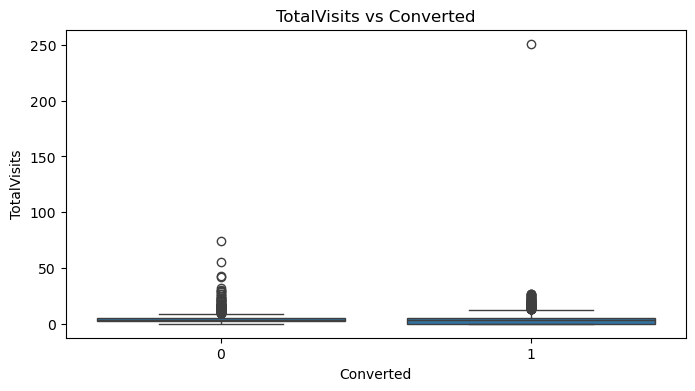

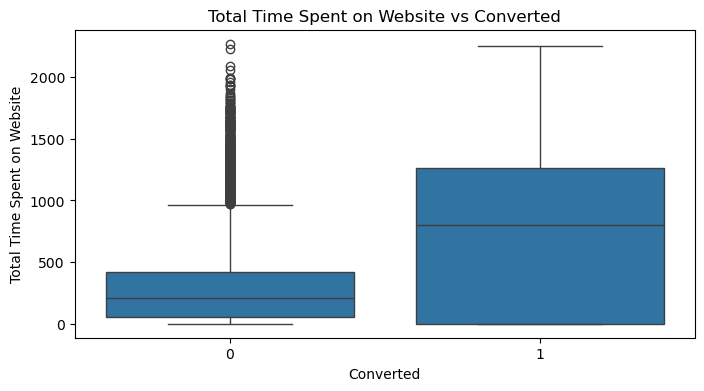

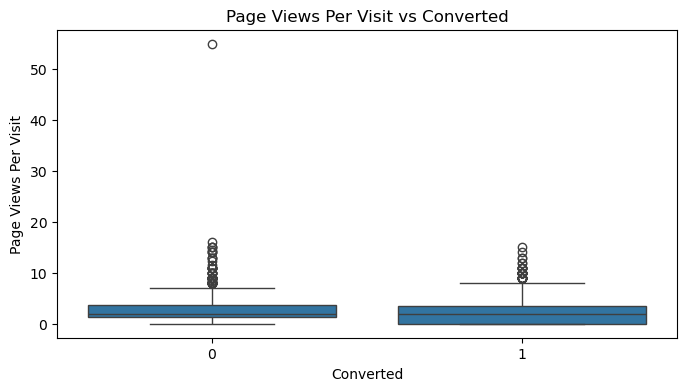

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bivariate Analysis: Numerical Features vs Target
print("Bivariate analysis between numerical features and the target (Converted):")
for col in ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=leads, x='Converted', y=col)
    plt.title(f'{col} vs Converted')
    plt.show()

In [192]:
leads[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000
mean,3.606717,535.279190,2.479565
std,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.250000,3.500000
max,251.000000,2272.000000,55.000000


In [193]:
# check outlier in TotalVisits
leads.TotalVisits.sort_values(ascending=False).head()

6102    251.0
5283     74.0
2190     55.0
1160     43.0
8230     42.0
Name: TotalVisits, dtype: float64

In [194]:
leads = leads[leads.TotalVisits<10]
leads.TotalVisits.sort_values(ascending=False).head()

758     9.0
6230    9.0
4243    9.0
6783    9.0
4225    9.0
Name: TotalVisits, dtype: float64

In [195]:
# check outlier in Total Time Spent on Website
leads['Total Time Spent on Website'].sort_values(ascending=False).head()

6314    2272
8745    2253
8393    2226
8787    2170
6698    2140
Name: Total Time Spent on Website, dtype: int64

In [196]:
len(leads[leads['Total Time Spent on Website']>2000])

15

In [197]:
leads = leads[leads['Total Time Spent on Website']<2000]
leads['Total Time Spent on Website'].sort_values(ascending=False).head(10)

1112    1995
982     1995
1887    1987
4995    1984
9026    1982
7536    1978
1454    1975
892     1966
4369    1966
9108    1965
Name: Total Time Spent on Website, dtype: int64

In [198]:
# seems one large outlier in Page Views Per Visit
leads['Page Views Per Visit'].sort_values(ascending=False).head()

438     9.0
415     9.0
6850    9.0
1915    9.0
1895    9.0
Name: Page Views Per Visit, dtype: float64

In [199]:
leads = leads[leads['Page Views Per Visit']<=7]
leads.TotalVisits.sort_values(ascending=False).head()

6862    9.0
6881    9.0
3878    9.0
392     9.0
5499    9.0
Name: TotalVisits, dtype: float64

Bivariate analysis between numerical features and the target (Converted):


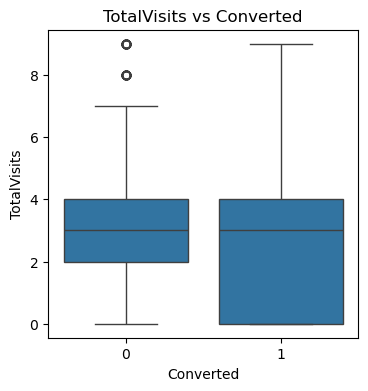

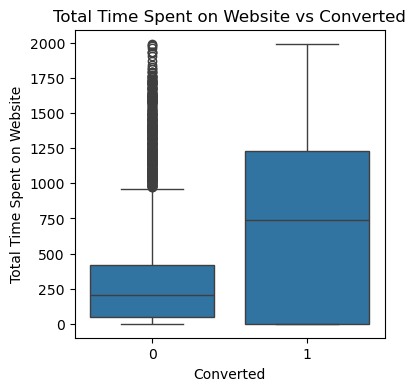

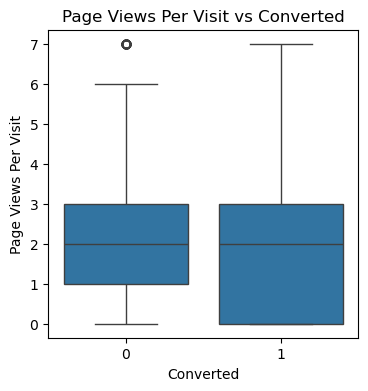

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bivariate Analysis: Numerical Features vs Target
print("Bivariate analysis between numerical features and the target (Converted):")
for col in ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=leads, x='Converted', y=col)
    plt.title(f'{col} vs Converted')
    plt.show()

#### The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [201]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Univariate Analysis for Categorical Features

Univariate analysis for categorical features:


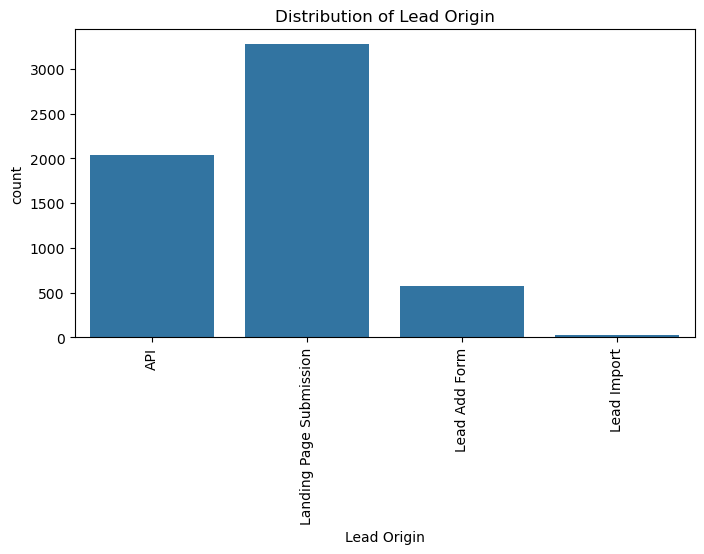

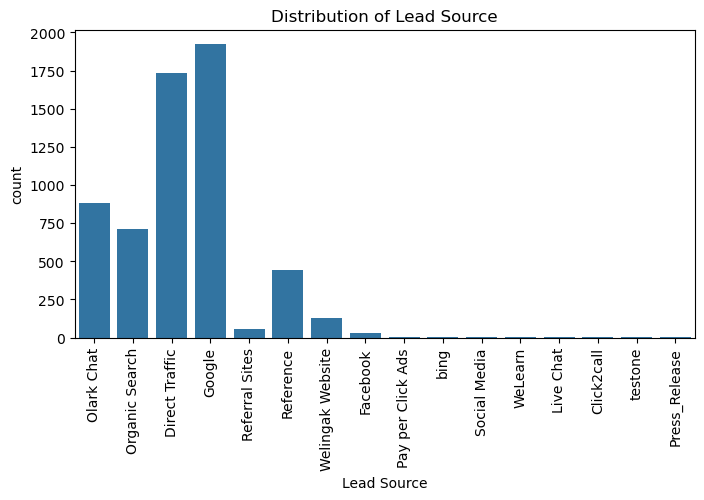

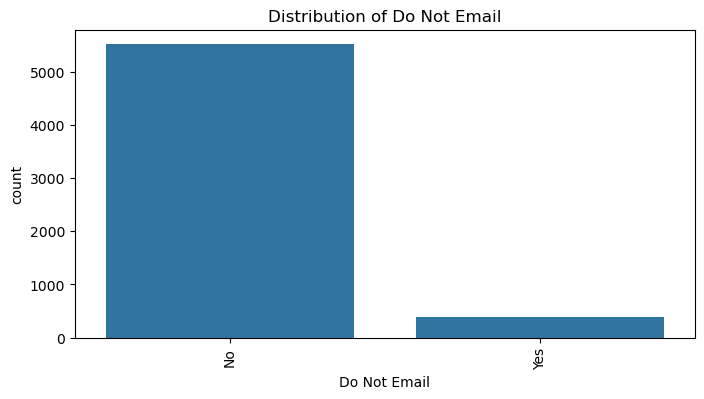

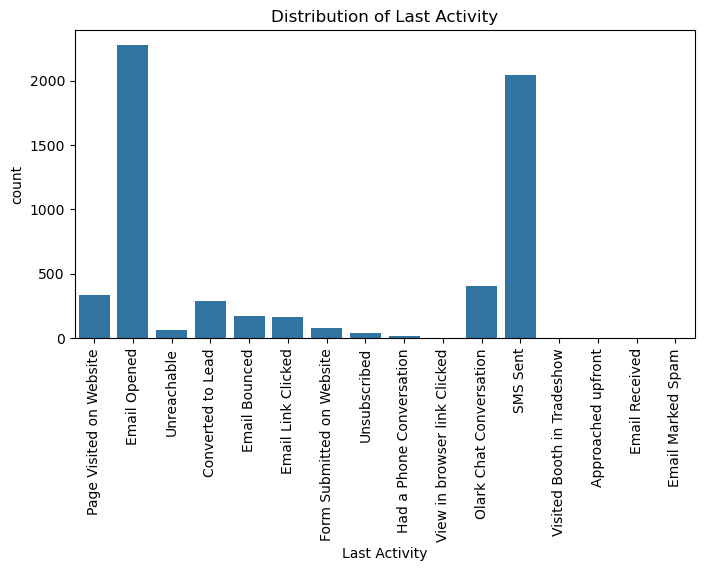

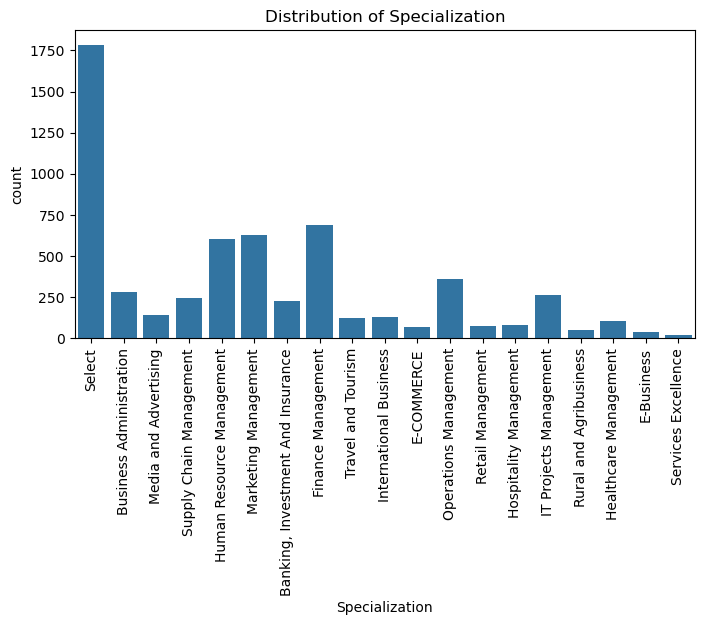

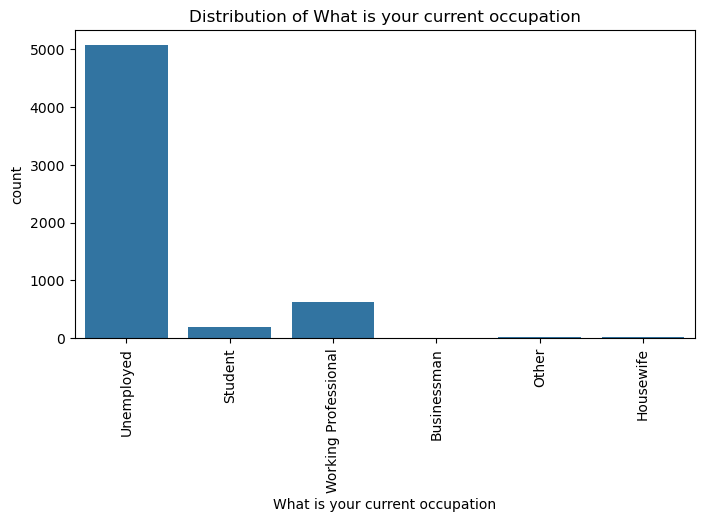

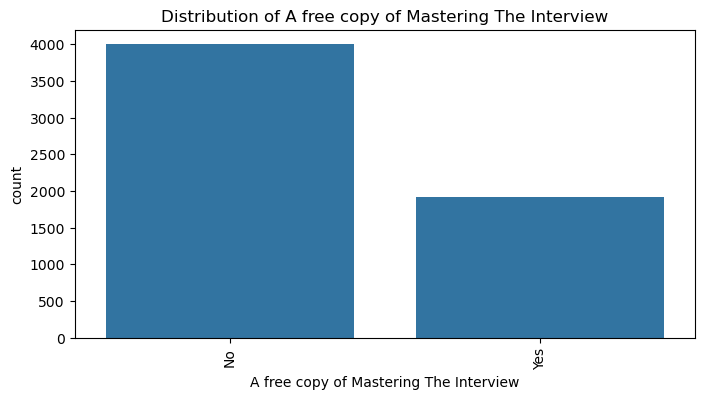

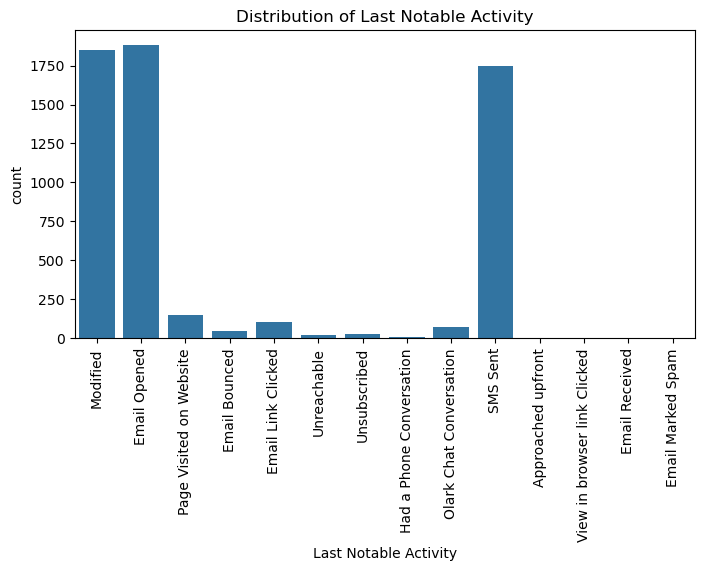

In [206]:

print("Univariate analysis for categorical features:")
categorical_cols = leads.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=leads, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

### Dummy variable creation

In [54]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [55]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [56]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [57]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,1,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [58]:
leads.columns.sort_values()

Index(['A free copy of Mastering The Interview_Yes', 'Converted',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',


### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [59]:
# Import the required library
from sklearn.model_selection import train_test_split

In [60]:
# Put all the feature variables in X

X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,1,0,0,1,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# Put the target variable in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [63]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [64]:
# Scale the three numeric features present in the dataset

fit_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()
X_train[fit_cols] = scaler.fit_transform(X_train[fit_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7331,0.333333,0.179449,0.428571,1,0,0,0,0,1,0,...,False,False,False,False,True,False,False,False,False,False
2276,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5070,0.222222,0.144361,0.285714,1,0,0,1,0,0,0,...,False,False,True,False,False,False,False,False,False,False
3301,0.555556,0.090727,0.714286,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2884,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

<Axes: >

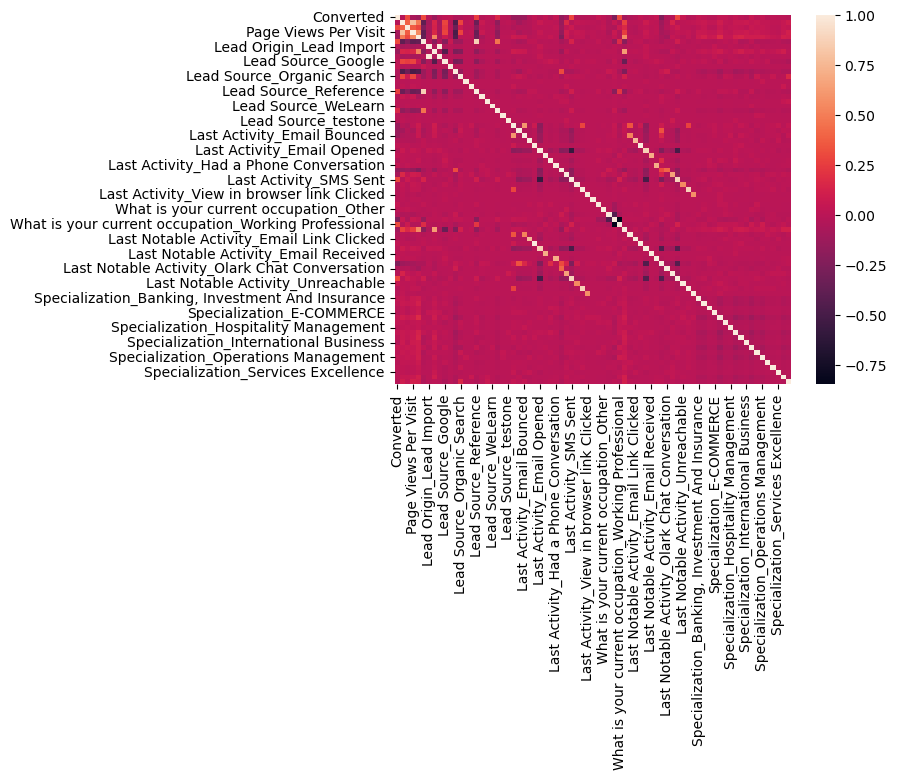

In [65]:
import seaborn as sns
sns.heatmap(leads.corr())

In [66]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,-0.024488,0.297309,-0.078805,-0.124305,0.303098,-0.017221,-0.139896,-0.019289,0.014438,...,0.000663,-0.022972,0.051481,-0.003384,0.026622,-0.014463,0.004427,-0.002572,-0.002478,-0.015650
TotalVisits,-0.024488,1.000000,0.381796,0.788487,0.484999,-0.391673,-0.084538,0.133875,-0.081690,0.278700,...,0.060032,0.075065,0.044953,0.061023,0.037770,0.032953,0.024998,0.024870,0.050413,0.086733
Total Time Spent on Website,0.297309,0.381796,1.000000,0.364896,0.287779,-0.254523,-0.061431,0.123132,-0.060855,0.246114,...,0.036104,0.012521,0.058831,0.044284,0.052914,0.031969,0.014376,0.005186,0.049172,0.033633
Page Views Per Visit,-0.078805,0.788487,0.364896,1.000000,0.539130,-0.400269,-0.085662,0.156467,-0.081510,0.283498,...,0.067759,0.078633,0.048981,0.064478,0.045823,0.035167,0.022631,0.012342,0.055159,0.107979
Lead Origin_Landing Page Submission,-0.124305,0.484999,0.287779,0.539130,1.000000,-0.366394,-0.074047,0.532780,-0.070418,0.078789,...,0.137038,0.096096,0.096685,0.094116,0.102889,0.072614,0.047070,0.038082,0.110865,0.093676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.014463,0.032953,0.031969,0.035167,0.072614,-0.026443,-0.007430,0.022133,-0.007572,0.027047,...,-0.024074,-0.016631,-0.038574,-0.017538,-0.028551,1.000000,-0.010114,-0.006832,-0.023343,-0.016160
Specialization_Rural and Agribusiness,0.004427,0.024998,0.014376,0.022631,0.047070,-0.017046,-0.006012,0.028626,-0.006127,-0.030590,...,-0.019479,-0.013457,-0.031213,-0.014191,-0.023102,-0.010114,1.000000,-0.005528,-0.018888,-0.013076
Specialization_Services Excellence,-0.002572,0.024870,0.005186,0.012342,0.038082,-0.010735,-0.004061,0.058228,-0.004139,-0.024617,...,-0.013158,-0.009090,-0.021084,-0.009586,-0.015606,-0.006832,-0.005528,1.000000,-0.012759,-0.008833
Specialization_Supply Chain Management,-0.002478,0.050413,0.049172,0.055159,0.110865,-0.034475,-0.001100,0.091941,-0.001603,-0.029392,...,-0.044957,-0.031057,-0.072037,-0.032751,-0.053319,-0.023343,-0.018888,-0.012759,1.000000,-0.030178


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [67]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [68]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15) # n_features_to_select is the number of features you want to select
rfe = rfe.fit(X_train, y_train)

In [69]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 53),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 57),
 ('Lead Source_testone', False, 40),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link C

In [70]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [71]:
X_train['Specialization_Services Excellence'] = X_train['Specialization_Services Excellence'].apply(lambda x : 0 if x==False else 1)
X_train['Specialization_Services Excellence']

7331    0
2276    0
5070    0
3301    0
2884    0
       ..
3024    0
623     0
110     0
6336    0
8838    0
Name: Specialization_Services Excellence, Length: 4139, dtype: int64

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [72]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [73]:
X_train.describe()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
count,4139.000000,4139.000000,4139.00000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000
mean,0.257074,0.098091,0.14907,0.020053,0.066683,0.049770,0.029234,0.003382,0.070790,0.053636,0.033100,0.859870,0.104131,0.318193,0.317710
std,0.278952,0.297474,0.35620,0.140199,0.249502,0.217497,0.168482,0.058067,0.256505,0.225325,0.178919,0.347164,0.305468,0.465831,0.465642
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010025,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.132331,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.496241,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
# Import statsmodels

import statsmodels.api as sm

In [76]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.shape

(4139, 16)

In [77]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

logm1 = sm.GLM(y_train.values, X_train_sm.values, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4139
Model:                            GLM   Df Residuals:                     4123
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1857.6
Date:                Tue, 17 Sep 2024   Deviance:                       3715.2
Time:                        22:36:22   Pearson chi2:                 4.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8237      0.960      0.858      0.391      -1.058       2.706
x1             4.0194      0.175     22.926      0.000       3.676       4.363
x2             3.8848      0.240     16.167      0.000       3.414       4.356
x3             1.3940      0.124     11.267      0.000       1.152       1.637
x4             2.4219      1.039      2.331      0.020       0.386       4.458
x5            -1.7659      0.207     -8.537      0.000      -2.171      -1.360
x6            -0.9820      0.236     -4.157      0.000      -1.445      -0.519
x7            -1.4777      0.264     -5.603      0.000      -1.995      -0.961
x8             1.8274      0.838      2.182      0.029       0.186       3.469
x9            -1.5050      0.203     -7.418      0.000      -1.903      -1.107
x10           -0.9887      0.199     -4.966      0.000      -1.379      -0.598
x11           -1.7864      0.979     -1.825      0.068      -3.705       0.132
x12           -1.7243      0.955     -1.805      0.071      -3.596       0.148
x13            0.8930      0.975      0.915      0.360      -1.019       2.805
x14           -1.0250      0.100    -10.274      0.000      -1.221      -0.829
x15           -1.1413      0.111    -10.243      0.000      -1.360      -0.923
==============================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [78]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,5.19
0,Total Time Spent on Website,2.39
14,Last Notable Activity_Modified,2.31
13,Last Notable Activity_Email Opened,2.04
1,Lead Origin_Lead Add Form,1.63
12,What is your current occupation_Working Profes...,1.61
2,Lead Source_Olark Chat,1.55
8,Last Activity_Olark Chat Conversation,1.41
5,Last Activity_Converted to Lead,1.30
3,Lead Source_Welingak Website,1.29


VIFs seem to be in a decent range except for three variables. 



In [80]:
# Let's first drop the variable `What is your current occupation_Unemployed` since it has a high VIF.
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [81]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4139
Model:                            GLM   Df Residuals:                     4124
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1859.6
Date:                Tue, 17 Sep 2024   Deviance:                       3719.1
Time:                        22:36:22   Pearson chi2:                 4.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3837
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9026      0.094     -9.639      0.000      -1.086      -0.719
Total Time Spent on Website                              4.0287      0.175     22.994      0.000       3.685       4.372
Lead Origin_Lead Add Form                                3.9004      0.240     16.242      0.000       3.430       4.371
Lead Source_Olark Chat                                   1.3947      0.124     11.276      0.000       1.152       1.637
Lead Source_Welingak Website                             2.4050      1.039      2.315      0.021       0.369       4.441
Do Not Email_Yes                                        -1.7697      0.207     -8.553      0.000      -2.175      -1.364
Last Activity_Converted to Lead                         -0.9901      0.236     -4.191      0.000      -1.453      -0.527
Last Activity_Email Link Clicked                        -1.4725      0.263     -5.603      0.000      -1.988      -0.957
Last Activity_Had a Phone Conversation                   1.8229      0.838      2.177      0.030       0.181       3.464
Last Activity_Olark Chat Conversation                   -1.5003      0.203     -7.400      0.000      -1.898      -1.103
Last Activity_Page Visited on Website                   -0.9844      0.199     -4.939      0.000      -1.375      -0.594
What is your current occupation_Student                 -0.0676      0.226     -0.300      0.764      -0.510       0.374
What is your current occupation_Working Professional     2.6129      0.208     12.563      0.000       2.205       3.021
Last Notable Activity_Email Opened                      -1.0214      0.100    -10.243      0.000      -1.217      -0.826
Last Notable Activity_Modified                          -1.1341      0.111    -10.193      0.000      -1.352      -0.916
========================================================================================================================
"""

The variable `What is your current occupation_Student` also needs to be dropped.

In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,Last Notable Activity_Modified,1.88
0,Total Time Spent on Website,1.53
1,Lead Origin_Lead Add Form,1.46
8,Last Activity_Olark Chat Conversation,1.40
12,Last Notable Activity_Email Opened,1.38
2,Lead Source_Olark Chat,1.32
3,Lead Source_Welingak Website,1.28
5,Last Activity_Converted to Lead,1.27
11,What is your current occupation_Working Profes...,1.20
9,Last Activity_Page Visited on Website,1.10


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `What is your current occupation_Student`.

In [83]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg = logm3.fit()
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4139
Model:                            GLM   Df Residuals:                     4125
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1859.6
Date:                Tue, 17 Sep 2024   Deviance:                       3719.2
Time:                        22:36:22   Pearson chi2:                 4.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3837
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9037      0.094     -9.659      0.000      -1.087      -0.720
Total Time Spent on Website                              4.0283      0.175     22.992      0.000       3.685       4.372
Lead Origin_Lead Add Form                                3.8985      0.240     16.243      0.000       3.428       4.369
Lead Source_Olark Chat                                   1.3930      0.124     11.276      0.000       1.151       1.635
Lead Source_Welingak Website                             2.4083      1.039      2.319      0.020       0.373       4.444
Do Not Email_Yes                                        -1.7690      0.207     -8.551      0.000      -2.175      -1.364
Last Activity_Converted to Lead                         -0.9915      0.236     -4.199      0.000      -1.454      -0.529
Last Activity_Email Link Clicked                        -1.4749      0.263     -5.616      0.000      -1.990      -0.960
Last Activity_Had a Phone Conversation                   1.8241      0.838      2.178      0.029       0.183       3.466
Last Activity_Olark Chat Conversation                   -1.5043      0.202     -7.435      0.000      -1.901      -1.108
Last Activity_Page Visited on Website                   -0.9847      0.199     -4.940      0.000      -1.375      -0.594
What is your current occupation_Working Professional     2.6154      0.208     12.584      0.000       2.208       3.023
Last Notable Activity_Email Opened                      -1.0228      0.100    -10.266      0.000      -1.218      -0.828
Last Notable Activity_Modified                          -1.1341      0.111    -10.193      0.000      -1.352      -0.916
========================================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [85]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.88
0,Total Time Spent on Website,1.52
1,Lead Origin_Lead Add Form,1.46
8,Last Activity_Olark Chat Conversation,1.39
11,Last Notable Activity_Email Opened,1.37
2,Lead Source_Olark Chat,1.31
3,Lead Source_Welingak Website,1.28
5,Last Activity_Converted to Lead,1.27
10,What is your current occupation_Working Profes...,1.20
9,Last Activity_Page Visited on Website,1.10


We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [86]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = log_reg.predict(sm.add_constant(X_train))
y_train_pred[:10]

7331    0.230825
2276    0.344141
5070    0.420138
3301    0.031026
2884    0.619922
2542    0.958116
1635    0.115286
1323    0.271758
3432    0.369682
5115    0.095011
dtype: float64

In [87]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23082521, 0.34414135, 0.42013801, 0.03102602, 0.61992173,
       0.95811626, 0.11528574, 0.27175781, 0.36968231, 0.09501088])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [88]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.230825
1,0,0.344141
2,0,0.420138
3,0,0.031026
4,1,0.619922


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [89]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.230825,0
1,0,0.344141,0
2,0,0.420138,0
3,0,0.031026,0
4,1,0.619922,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [90]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [91]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1848  347]
 [ 513 1431]]


In [92]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7922203430780381


In [93]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Calculate the sensitivity

TP/(TP+FN)

0.7361111111111112

In [95]:
# Calculate the specificity

TN/(TN+FP)

0.8419134396355353

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [96]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [98]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

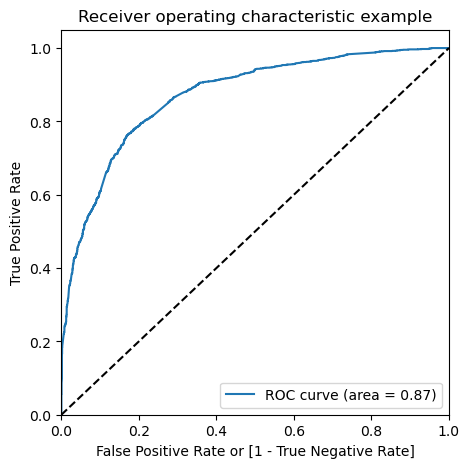

In [99]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [100]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.230825,0,1,1,1,0,0,0,0,0,0,0
1,0,0.344141,0,1,1,1,1,0,0,0,0,0,0
2,0,0.420138,0,1,1,1,1,1,0,0,0,0,0
3,0,0.031026,0,1,0,0,0,0,0,0,0,0,0
4,1,0.619922,1,1,1,1,1,1,1,1,0,0,0


In [101]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.469679  1.000000  0.000000
0.1   0.1  0.566562  0.987654  0.193622
0.2   0.2  0.706692  0.935700  0.503872
0.3   0.3  0.767335  0.898663  0.651025
0.4   0.4  0.793187  0.800412  0.786788
0.5   0.5  0.792220  0.736111  0.841913
0.6   0.6  0.781348  0.672325  0.877904
0.7   0.7  0.749940  0.553498  0.923918
0.8   0.8  0.720464  0.451646  0.958542
0.9   0.9  0.655956  0.282922  0.986333


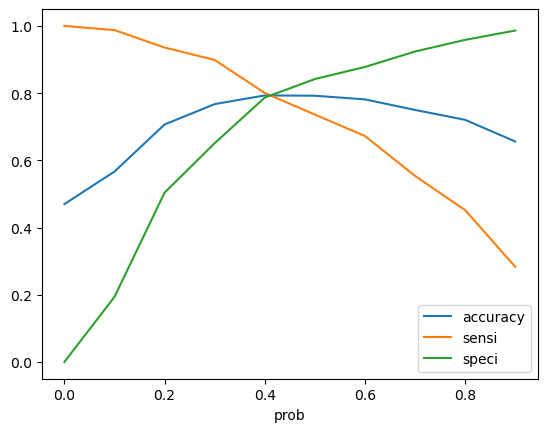

In [102]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.230825,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.344141,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.420138,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.031026,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.619922,1,1,1,1,1,1,1,1,0,0,0,1


In [104]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7941531770959169

In [105]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)



[[1754  441]
 [ 411 1533]]


In [106]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Calculate Sensitivity

TP/(TP+FN)

0.7885802469135802

In [108]:
# Calculate Specificity

TN/(TN+FP)

0.7990888382687927

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [109]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = \
scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [110]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
3894,0.022556,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2340,0.043609,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2356,0.707268,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6536,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6305,0.713784,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [111]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [112]:
# Check X_test_sm

X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
3894,1.0,0.022556,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2340,1.0,0.043609,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2356,1.0,0.707268,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6536,1.0,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6305,1.0,0.713784,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,1.0,0.780952,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9183,1.0,0.477193,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3001,1.0,0.824561,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5918,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [113]:
X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [114]:
# Drop the required columns from X_test as well

X_test = X_test[['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified']]

In [115]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = log_reg.predict(sm.add_constant(X_test))

In [116]:
y_test_pred[:10]

3894    0.137564
2340    0.134449
2356    0.715568
6536    0.369682
6305    0.877786
5350    0.465441
7856    0.347465
8796    0.054380
8495    0.987801
622     0.889121
dtype: float64

In [117]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [118]:
# Let's see the head

y_pred_1.head()

,0
3894,0.137564
2340,0.134449
2356,0.715568
6536,0.369682
6305,0.877786


In [119]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [120]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [122]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.137564
1,0,0.134449
2,1,0.715568
3,1,0.369682
4,1,0.877786


In [123]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [124]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.137564
1,0,0.134449
2,1,0.715568
3,1,0.369682
4,1,0.877786


In [125]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [126]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.137564,0
1,0,0.134449,0
2,1,0.715568,1
3,1,0.369682,0
4,1,0.877786,1


In [127]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7824126268320181

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[727, 179],
       [207, 661]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Calculate sensitivity
TP / float(TP+FN)

0.761520737327189

In [131]:
# Calculate specificity
TN / float(TN+FP)

0.8024282560706402

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [132]:
#Looking at the confusion matrix again
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[727, 179],
       [207, 661]], dtype=int64)

In [133]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1848,  347],
       [ 513, 1431]], dtype=int64)

##### Precision
TP / TP + FP

In [134]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8048368953880765

##### Recall
TP / TP + FN

In [135]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7361111111111112

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4134    1
 4135    1
 4136    1
 4137    0
 4138    0
 Name: Converted, Length: 4139, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4134    1
 4135    1
 4136    0
 4137    1
 4138    1
 Name: Predicted, Length: 4139, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

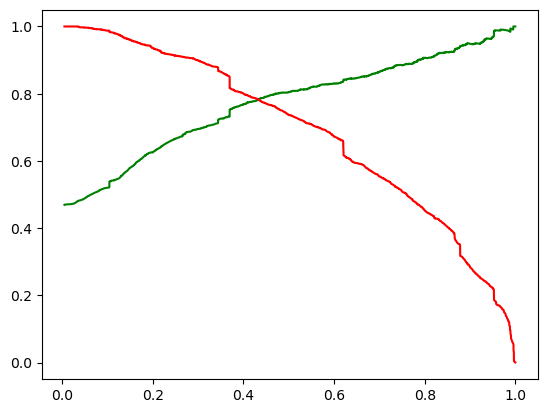

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.230825,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.344141,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.420138,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.031026,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.619922,1,1,1,1,1,1,1,1,0,0,0,1


In [141]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7963276153660305

In [142]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1787,  408],
       [ 435, 1509]], dtype=int64)

In [143]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Calculate Precision

TP/(TP+FP)

0.7871674491392802

In [145]:
# Calculate Recall

TP/(TP+FN)

0.7762345679012346

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [146]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

ValueError: shapes (1774,14) and (16,) not aligned: 14 (dim 1) != 16 (dim 0)

In [132]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [133]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [135]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [136]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [139]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [140]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [141]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [142]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [143]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]])

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Calculate Precision

TP/(TP+FP)

0.7828507795100222

In [147]:
# Calculate Recall

TP/(TP+FN)

0.767467248908297